In [51]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [80]:
samsung_reviews=[]

# Extracting reviews from amazon for product Samsung Galaxy S20

In [81]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [82]:
samsung_reviews

['\nBasically used to have Apple products . Felt that apple products were much better than other smart phones.  Also in the past I used to have Samsung S Duos and Galaxy S7. Their performance were not upto standards.  This time  for a change I thought of buying Samsung S20 Ultra. I have the cosmic grey version. Initially I was not very sure about its performance. Now I am super impressed with its performance for the following reason1. Battery life  : It almost lasts me for more than 1 day . Am a heavy user for various apps. Also the apps work seamlessly without any hassle.  The transition between the apps is also very nice2. Clear pictures3. It has a very nice sound quality .4. Becasues of the large screen size it is very easy to operate and there are lot of more features which i am super impressedI have paired by my phone with Samsung Galaxy buds+ and  Samsung S3 watch (46mm). So my workouts are getting synced without any hassle.With all this I would like to mention that I am super im

In [83]:
reviews = ' '.join(samsung_reviews)

# Data Cleaning

In [84]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

# tokenize

In [85]:
reviews_token = word_tokenize(reviews)

In [86]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [67]:
reviews_without_sw

['basically',
 'apple',
 'products',
 'felt',
 'apple',
 'products',
 'smart',
 'phones',
 'past',
 'samsung',
 'duos',
 'galaxy',
 'performance',
 'upto',
 'standards',
 'time',
 'change',
 'buying',
 'samsung',
 'ultra',
 'cosmic',
 'grey',
 'version',
 'initially',
 'performance',
 'super',
 'impressed',
 'performance',
 'reason',
 'battery',
 'life',
 'lasts',
 'day',
 'heavy',
 'user',
 'apps',
 'apps',
 'work',
 'seamlessly',
 'hassle',
 'transition',
 'apps',
 'nice',
 'clear',
 'pictures',
 'nice',
 'sound',
 'quality',
 'becasues',
 'large',
 'screen',
 'size',
 'easy',
 'operate',
 'lot',
 'features',
 'super',
 'impressedi',
 'paired',
 'phone',
 'samsung',
 'galaxy',
 'buds',
 'samsung',
 'watch',
 'mm',
 'workouts',
 'synced',
 'hassle',
 'mention',
 'super',
 'impressed',
 'phone',
 'steal',
 'price',
 'slightly',
 'higher',
 'side',
 'neglected',
 'features',
 'offers',
 'ultra',
 'inches',
 'pure',
 'smoothness',
 'brilliance',
 'coming',
 'pro',
 'upgrade',
 'pro',
 's

In [68]:
reviews=' '.join(reviews_without_sw)

# Word cloud

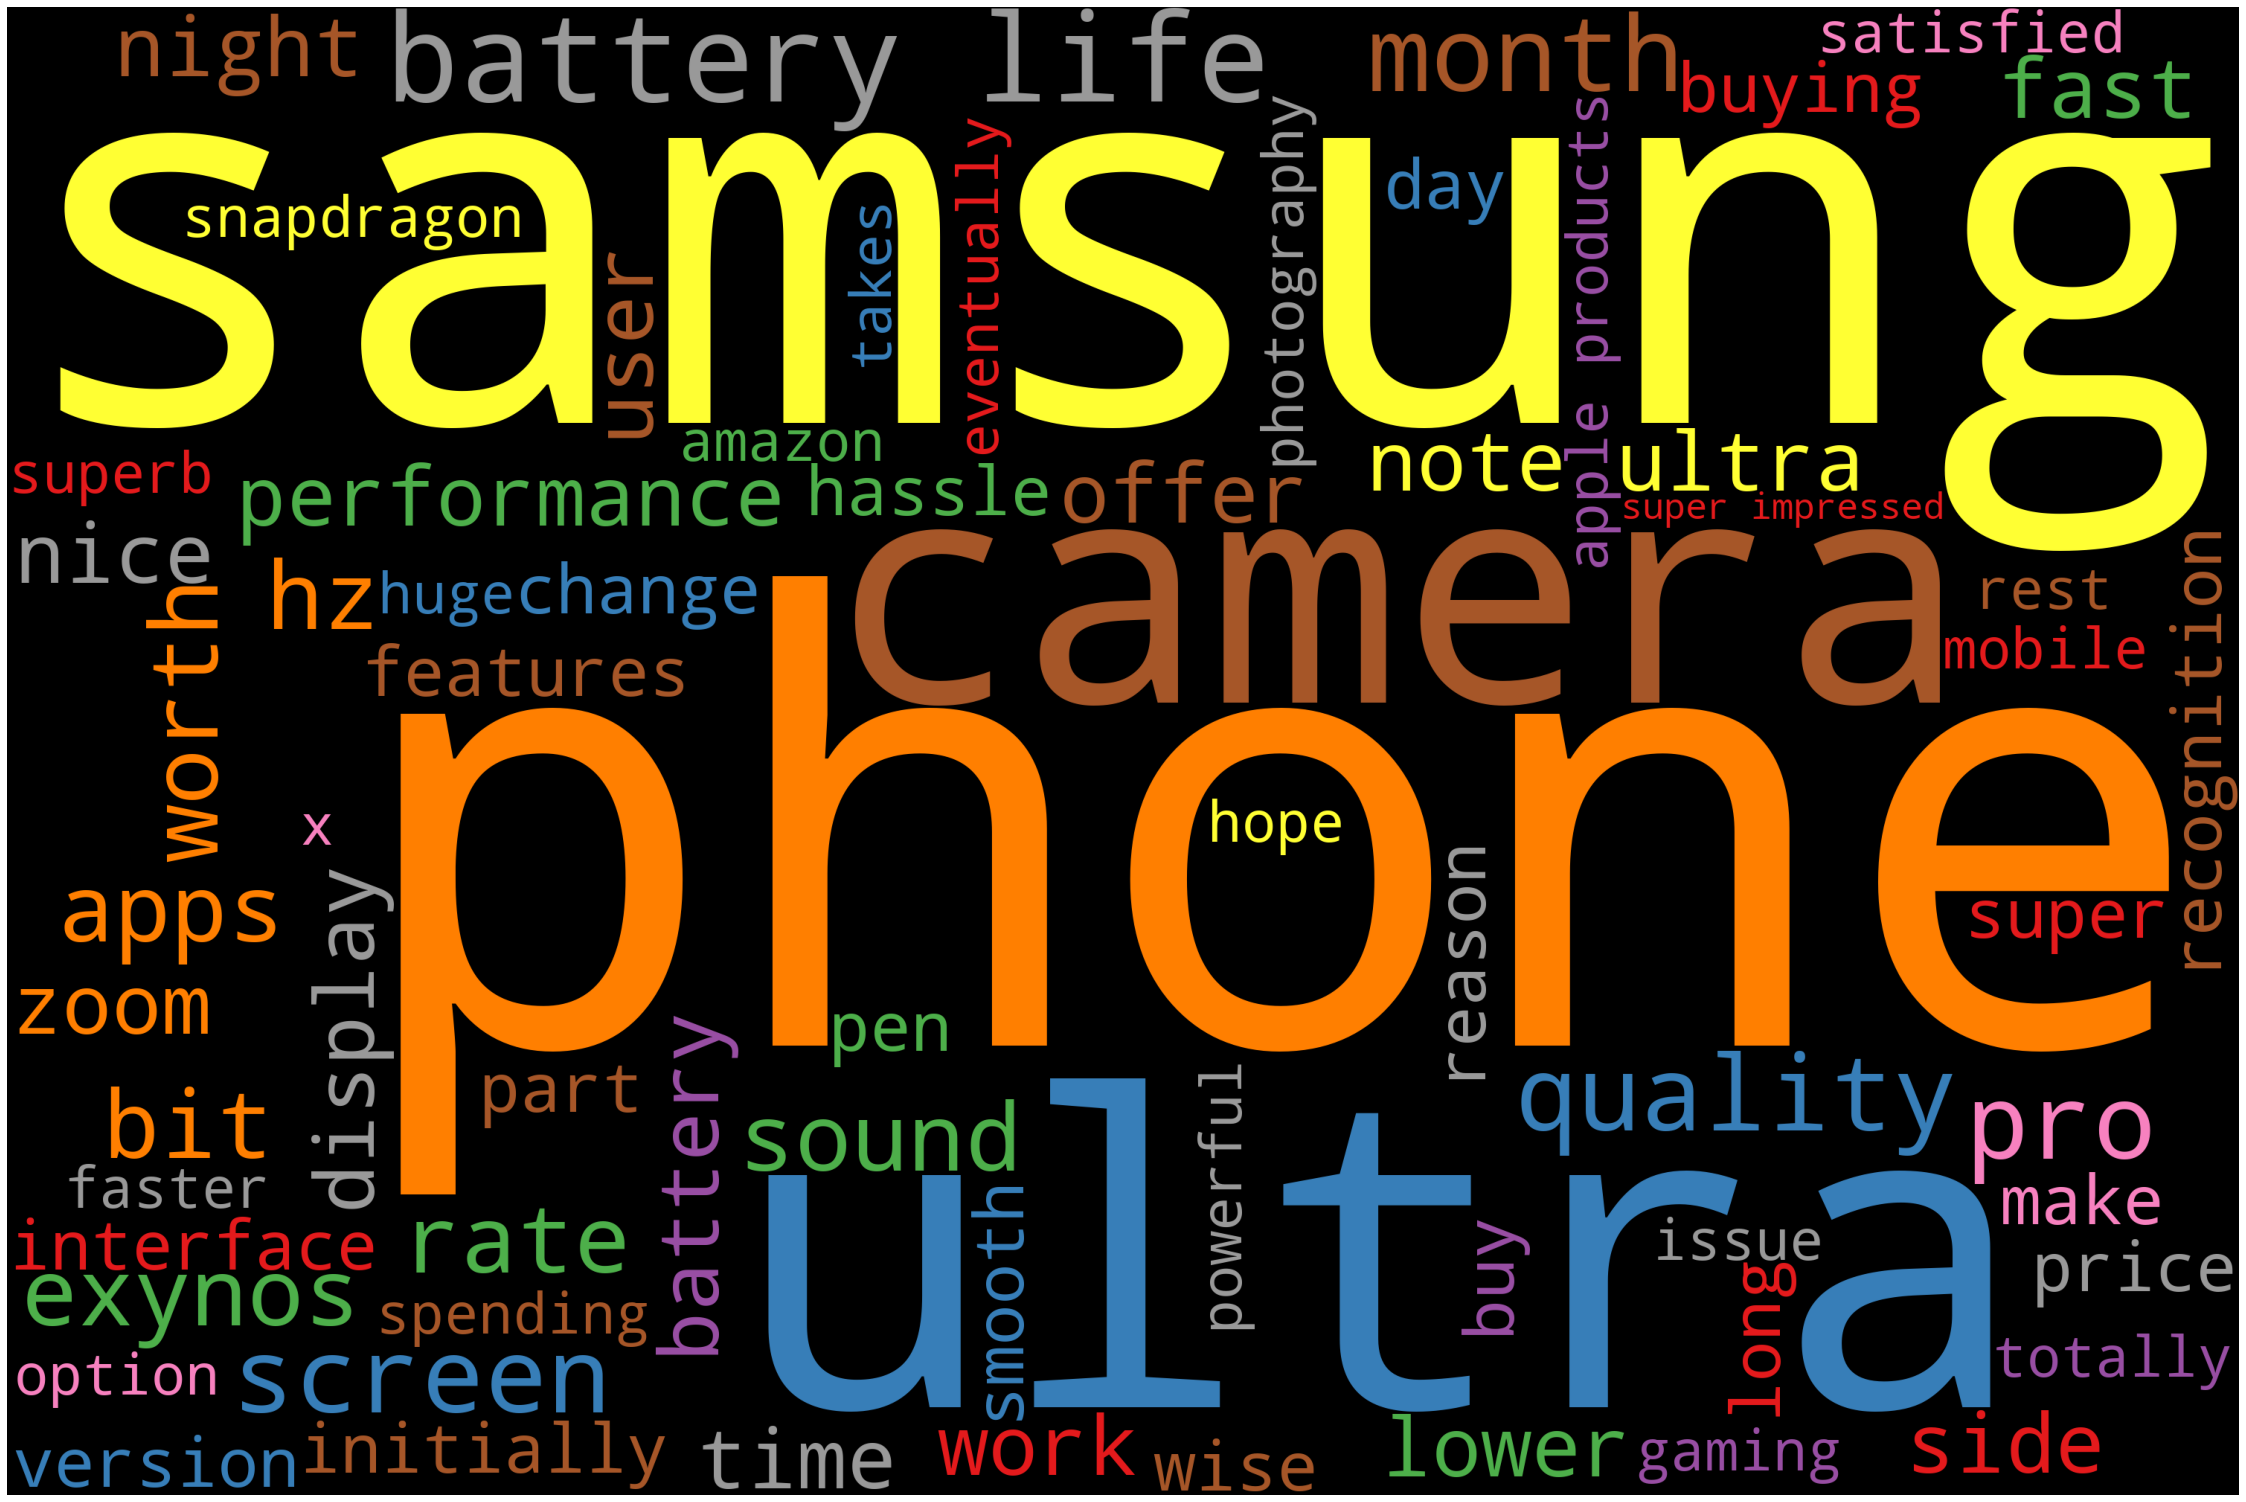

In [69]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

# Emotion Mining

In [70]:
with open("negative-words.txt","r") as f:
    negative=f.read().split("\n")

In [71]:
negative = negative[35:]

In [72]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

# Word Cloud for negative word

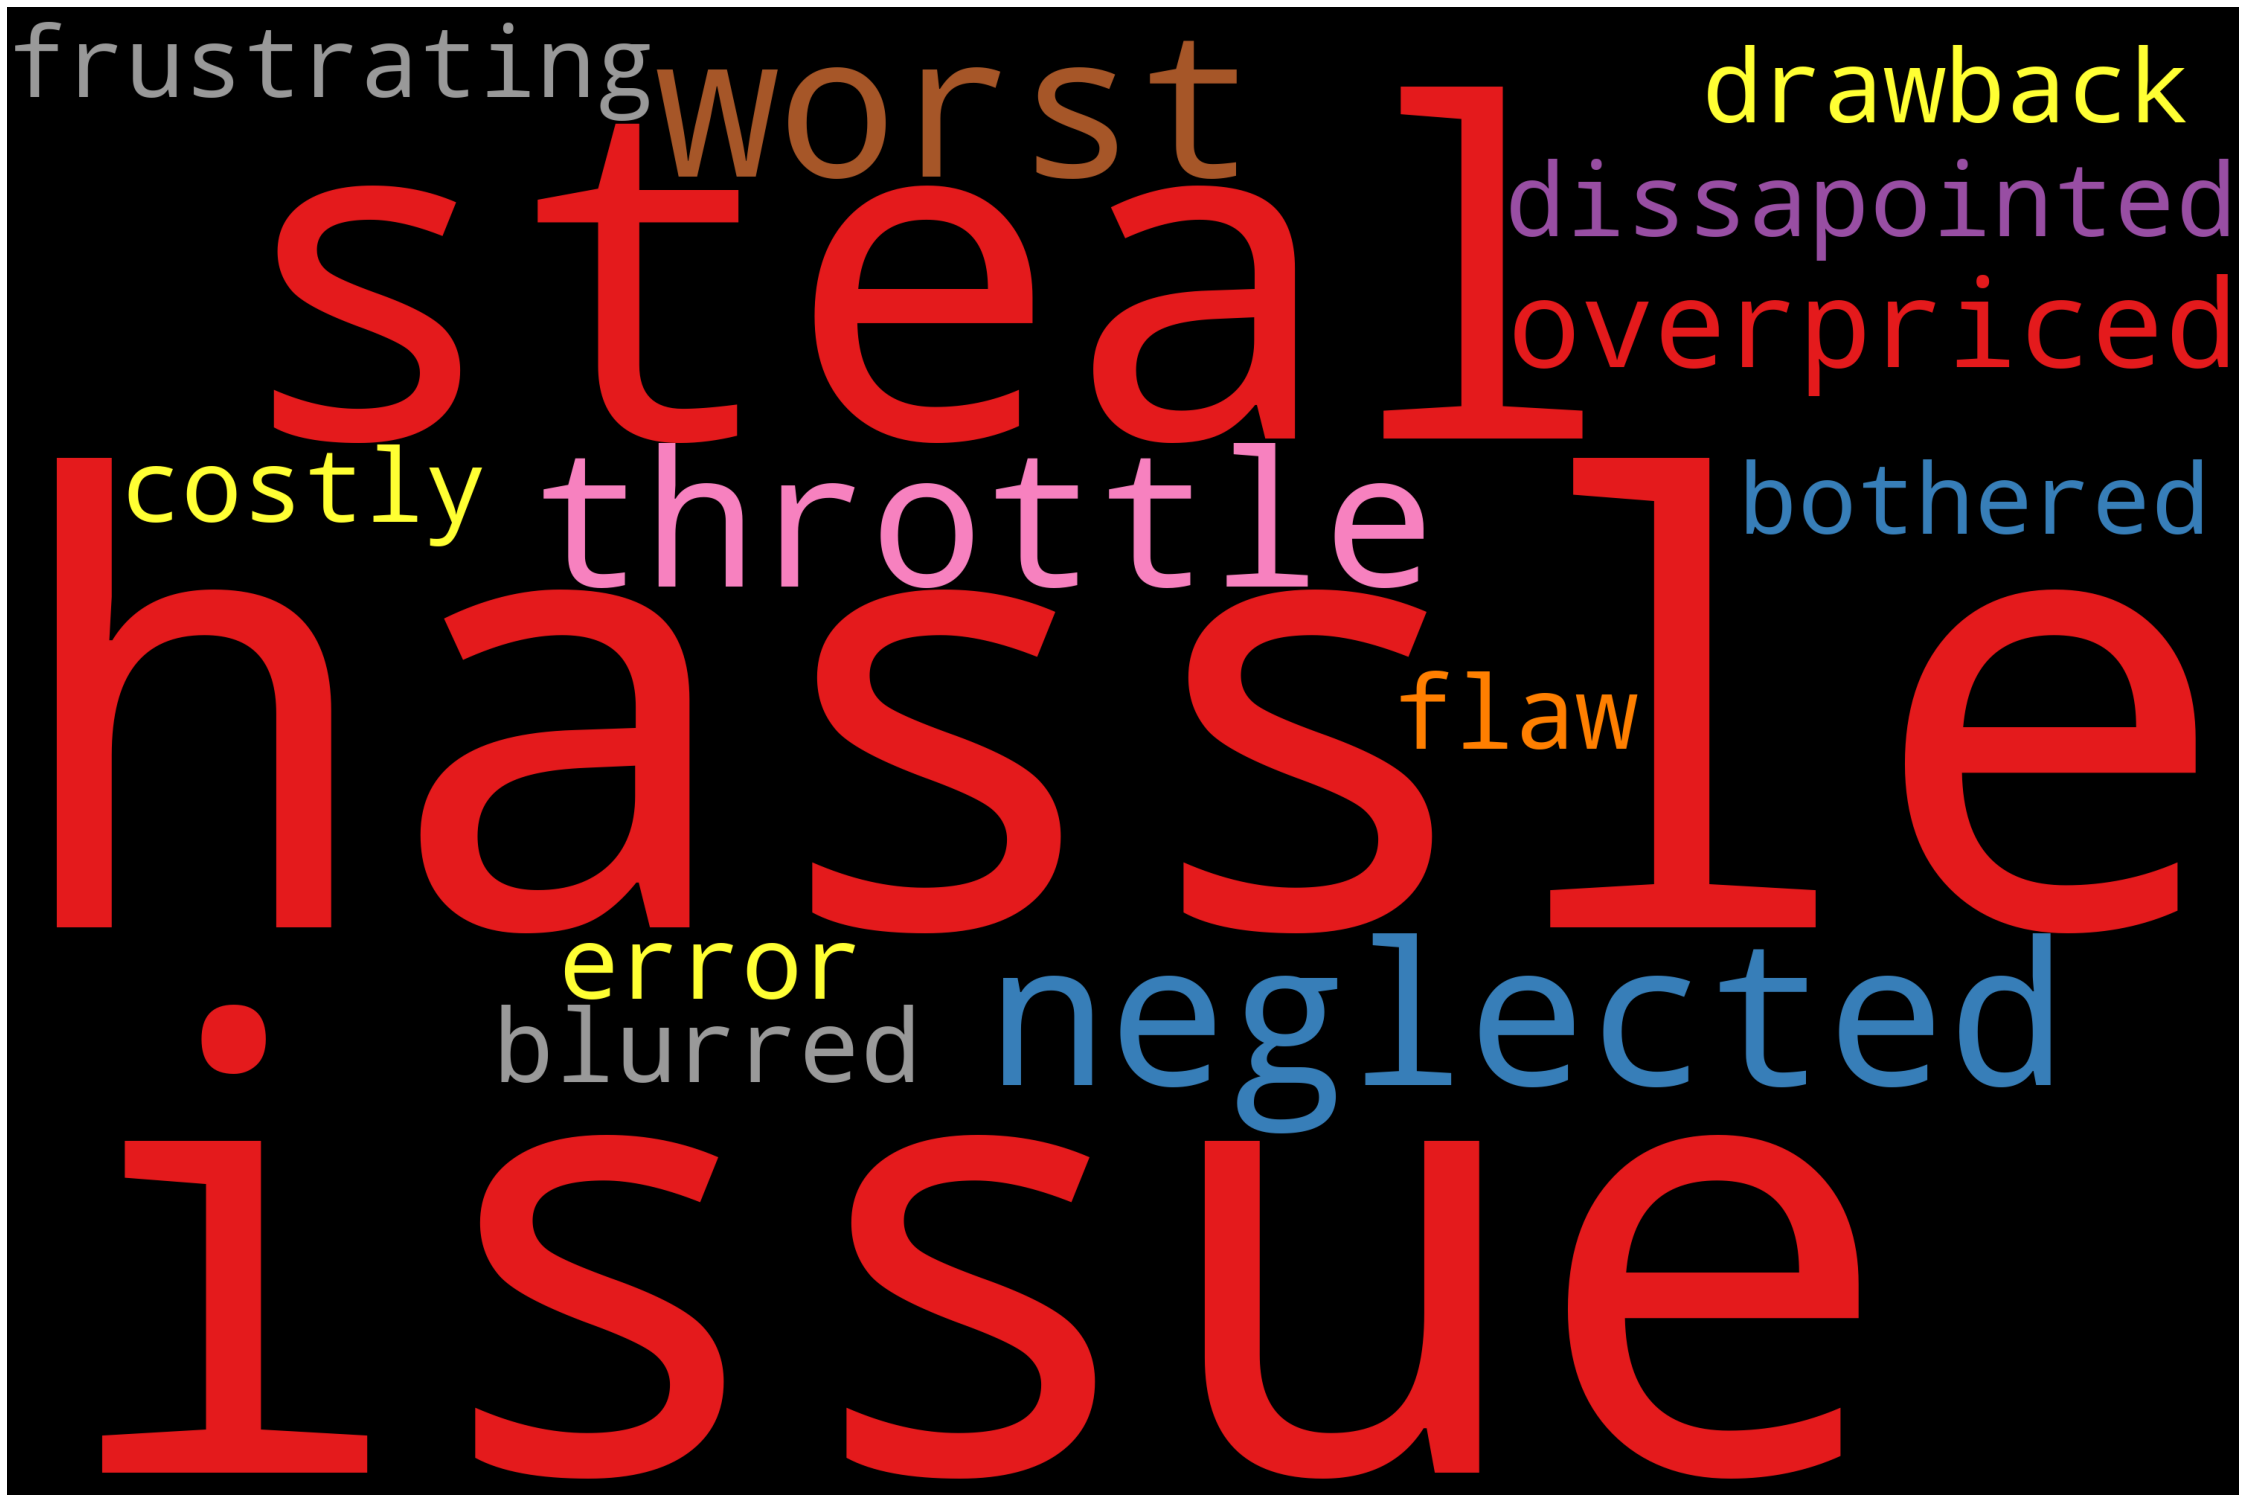

In [73]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [75]:
with open("positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [76]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [77]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

# Word Cloud for positive word

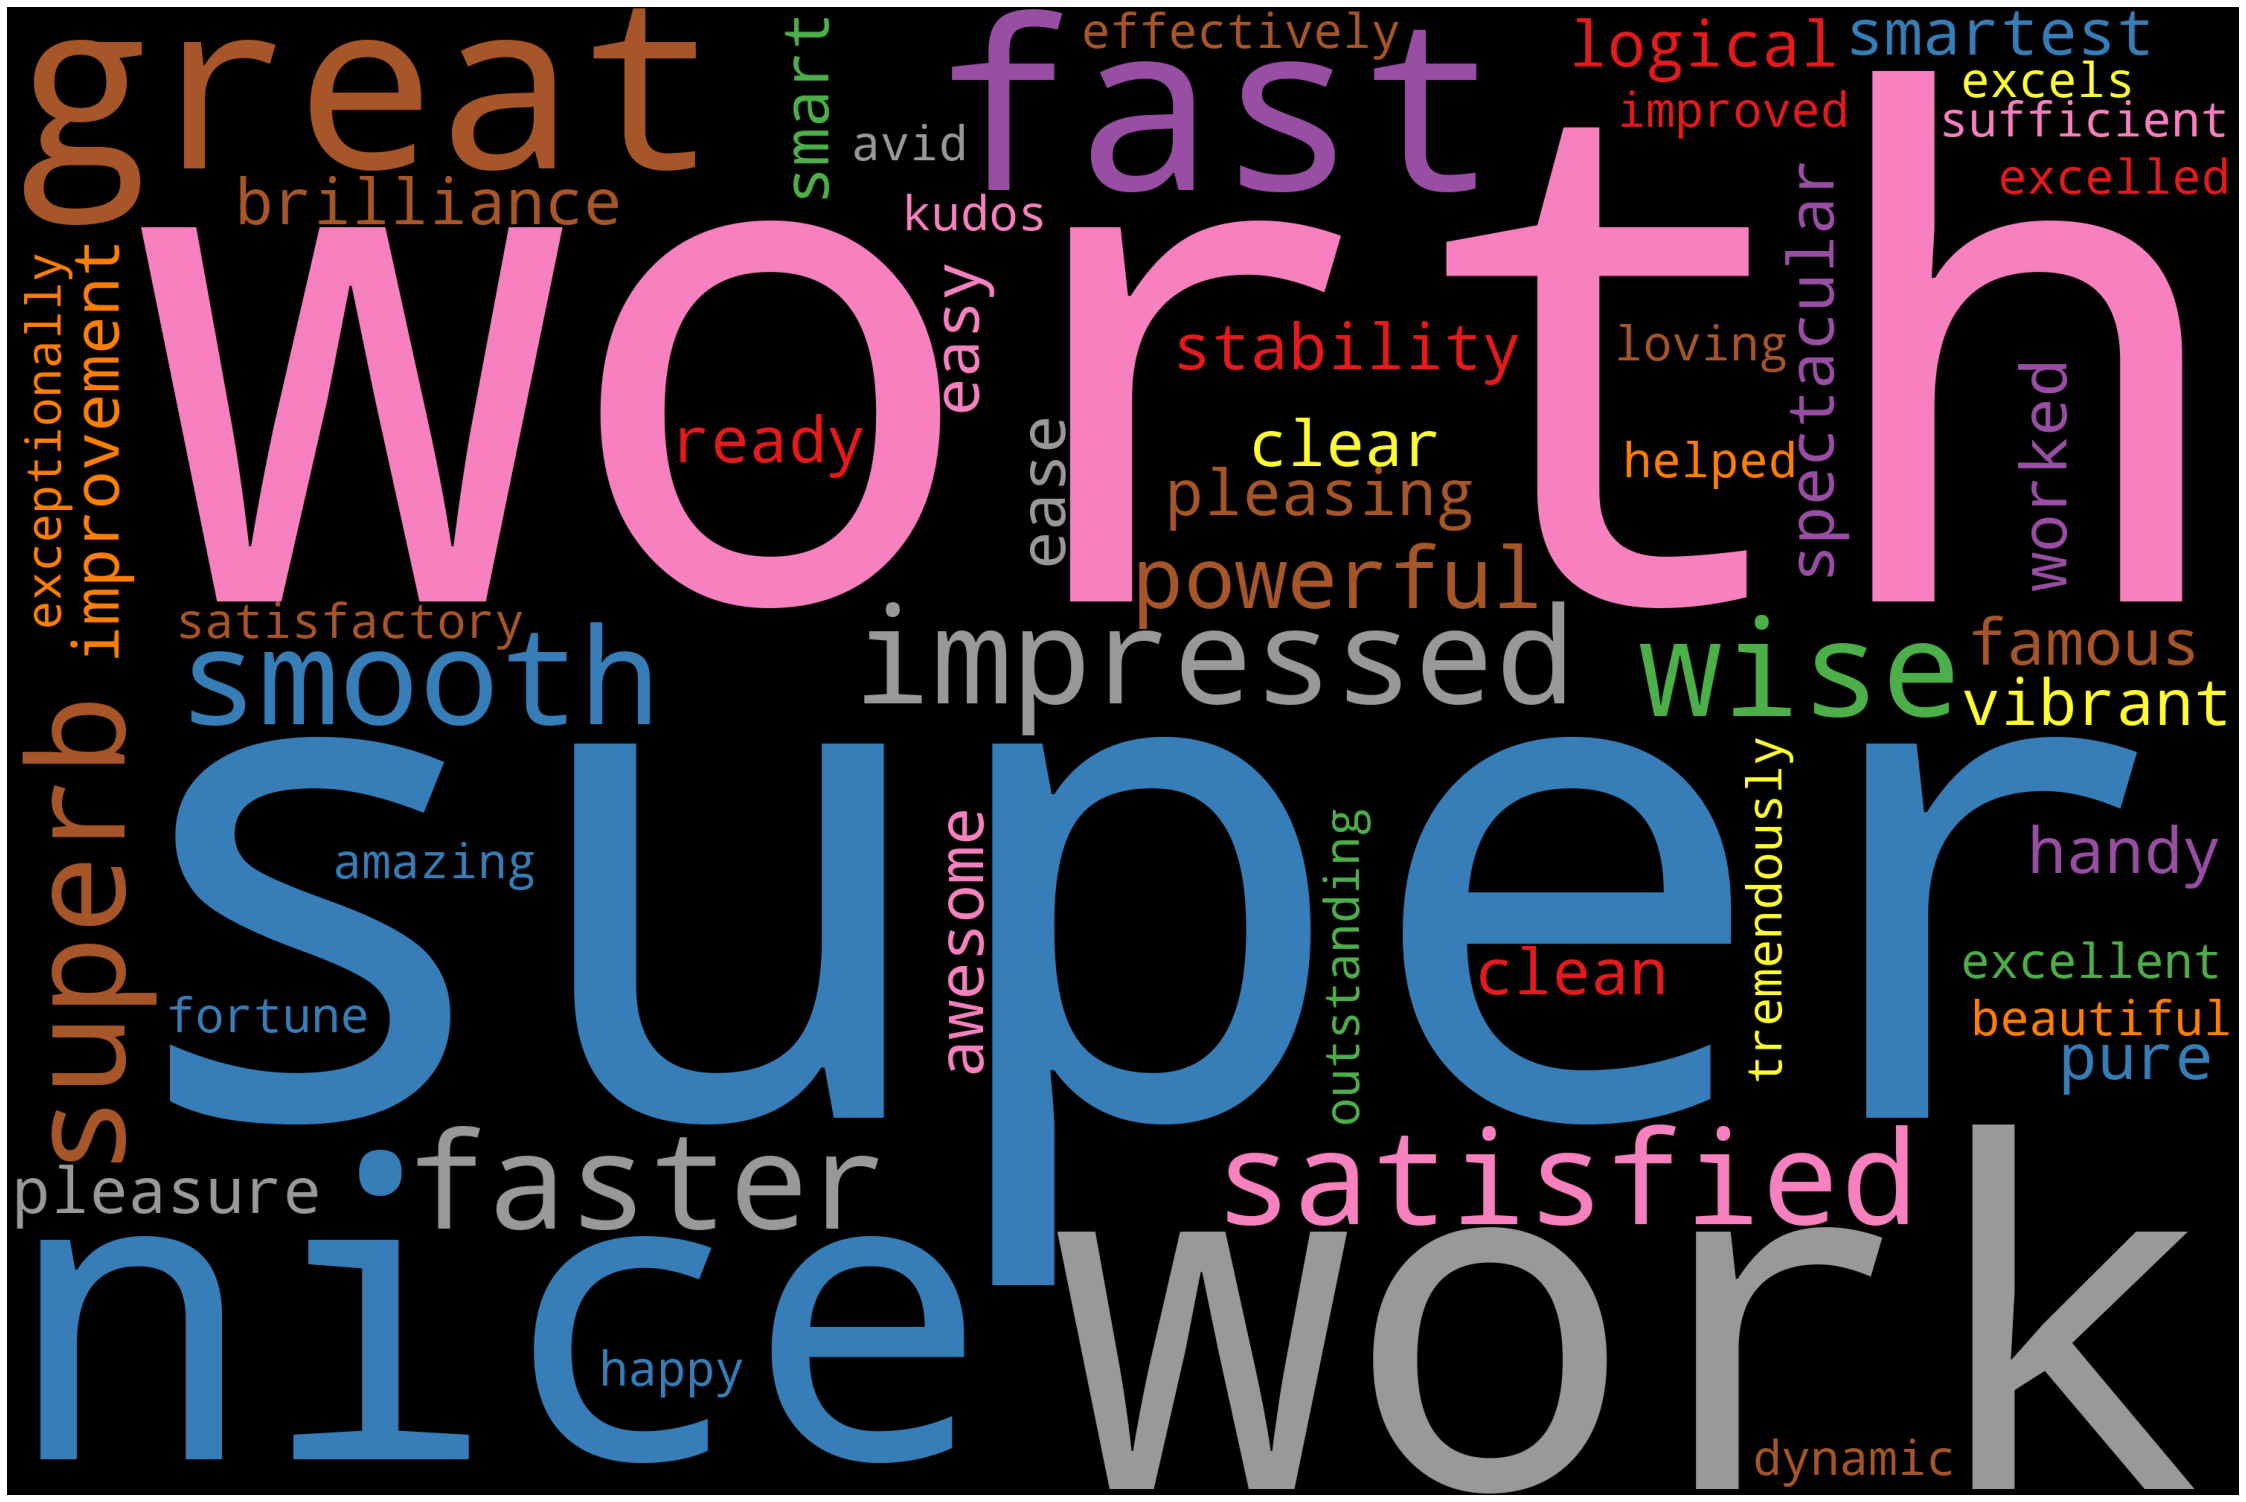

In [79]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)